In [2]:
from numpy import *

## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each row) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.



In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame by read N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [15]:
data=pd.read_csv("data_000636.csv")
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,60,3869187117,788,15
1,1,0,63,3869187117,787,23
2,1,0,64,3869187117,786,12
3,1,1,1,3869187117,1078,14
4,1,0,27,3869187117,1080,9
...,...,...,...,...,...,...
1310715,1,1,1,3869200166,3544,7
1310716,1,0,63,3869200166,3544,23
1310717,1,0,64,3869200166,3547,11
1310718,1,1,1,3869200167,204,25


2\. Find out the value of 'x'

In [16]:
pd.crosstab(index=data["ORBIT_CNT"], columns="count")

col_0,count
ORBIT_CNT,
3869187117,127
3869187118,69
3869187119,81
3869187120,106
3869187121,124
...,...
3869200163,61
3869200164,113
3869200165,128


In [17]:
print("Maximum value for BX_COUNTER is:", data["BX_COUNTER"].max(), ". Minimum value for BX_COUNTER is:", data["BX_COUNTER"].min() )

period = data["BX_COUNTER"].max() - data["BX_COUNTER"].min()
print("1 ORBIT COUNTER is ",(period+1), "in unit of BX_COUNTER.")


print("\nMaximum value for TDC_MEAS is:", data["TDC_MEAS"].max(), ". Minimum value for TDC_MEAS is:", data["TDC_MEAS"].min() )

period_MEAS = data["TDC_MEAS"].max() - data["TDC_MEAS"].min()
print("1 BX_COUNTER is ", period_MEAS+1, "in unit of TDC_MEAS.")

Maximum value for BX_COUNTER is: 3563 . Minimum value for BX_COUNTER is: 0
1 ORBIT COUNTER is  3564 in unit of BX_COUNTER.

Maximum value for TDC_MEAS is: 29 . Minimum value for TDC_MEAS is: 0
1 BX_COUNTER is  30 in unit of TDC_MEAS.


3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset

In [8]:
minimum =  data["ORBIT_CNT"].min()
maximum =  data["ORBIT_CNT"].max()
total_time = (maximum - minimum)*25*(period+1)

print("Total time for data acquisition is almost, at first approximation:", total_time, "ns")

Total time for data acquisition is almost, at first approximation: 1162755000 ns


4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

In [9]:
data['TIME (ns)'] = data['TDC_MEAS']*(25/30) + data['BX_COUNTER']*25 + ((data["ORBIT_CNT"]))*(period+1)*25

offset = data['BX_COUNTER'][0]*25 + data['TDC_MEAS'][0]*(25/30) + data['ORBIT_CNT'][0]*25*(period+1)

data['TIME (ns)'] = data['TIME (ns)'] - offset

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME (ns)
0,1,0,60,3869187117,788,15,0.000000e+00
1,1,0,63,3869187117,787,23,-1.831250e+01
2,1,0,64,3869187117,786,12,-5.250000e+01
3,1,1,1,3869187117,1078,14,7.249188e+03
4,1,0,27,3869187117,1080,9,7.295000e+03
...,...,...,...,...,...,...,...
1310715,1,1,1,3869200166,3544,7,1.162735e+09
1310716,1,0,63,3869200166,3544,23,1.162735e+09
1310717,1,0,64,3869200166,3547,11,1.162735e+09
1310718,1,1,1,3869200167,204,25,1.162740e+09


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1


In [10]:
data["HEAD"] = np.random.randint(2, size = len(data)) 

pd.crosstab(index=data["HEAD"], columns="count")

col_0,count
HEAD,
0,655833
1,654887


6\. Create a new DataFrame with only the rows with HEAD=1


In [11]:
data_parsed = data[data["HEAD"] == 1]

data_parsed

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME (ns)
1,1,0,63,3869187117,787,23,-1.831250e+01
2,1,0,64,3869187117,786,12,-5.250000e+01
3,1,1,1,3869187117,1078,14,7.249188e+03
4,1,0,27,3869187117,1080,9,7.295000e+03
5,1,0,49,3869187117,1077,3,7.215000e+03
...,...,...,...,...,...,...,...
1310710,1,0,60,3869200166,3541,16,1.162735e+09
1310713,1,1,3,3869200166,3543,18,1.162735e+09
1310715,1,1,1,3869200166,3544,7,1.162735e+09
1310717,1,0,64,3869200166,3547,11,1.162735e+09


7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel


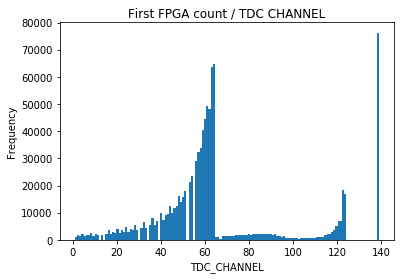

In [21]:


first_FPGA = data[data["FPGA"] == 0]
second_FPGA = data[data["FPGA"] == 1]

first_FPGA['TDC_CHANNEL'].plot.hist(bins = 139, title = "First FPGA count / TDC CHANNEL")
plt.xlabel('TDC_CHANNEL')
plt.draw()

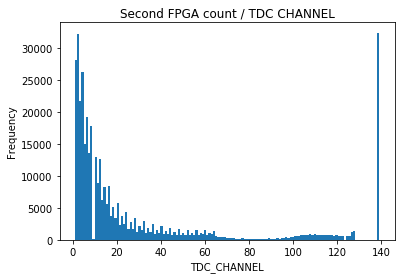

In [22]:
second_FPGA['TDC_CHANNEL'].plot.hist(bins = 139, title = "Second FPGA count / TDC CHANNEL")
plt.xlabel('TDC_CHANNEL')
plt.draw()

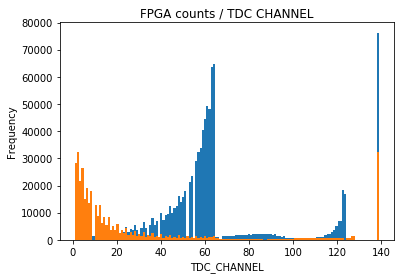

In [25]:
first_FPGA['TDC_CHANNEL'].plot.hist(bins = 139)
second_FPGA['TDC_CHANNEL'].plot.hist(bins = 139, title = "FPGA counts / TDC CHANNEL")
plt.xlabel('TDC_CHANNEL')
plt.draw()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)


In [26]:
data_group = data[['HEAD', 'FPGA', 'TDC_CHANNEL']].groupby(['FPGA','TDC_CHANNEL']).sum()
data_group

HEAD
FPGA TDC_CHANNEL       
0    1             1225
     2             1657
     3             1479
     4             2307
     5             1367
...                 ...
1    129             34
     130             35
     137             36
     138             34
     139          32459

[255 rows x 1 columns]

In [27]:
data_group = data_group.sort_values( by = ["FPGA", "HEAD"] , ascending = False 
data_group

SyntaxError: invalid syntax (<ipython-input-27-7a7a7f20c6f8>, line 2)

In [28]:
noisy0 = data_group["HEAD"][0].nlargest(3)
print("For FPGA0 the noisiest bins are " , list(noisy0.index))

noisy1 = data_group["HEAD"][1].nlargest(3)
print("For FPGA1 the noisiest bins are " , list(noisy1.index))

For FPGA0 the noisiest bins are  [139, 64, 63]
For FPGA1 the noisiest bins are  [139, 2, 1]


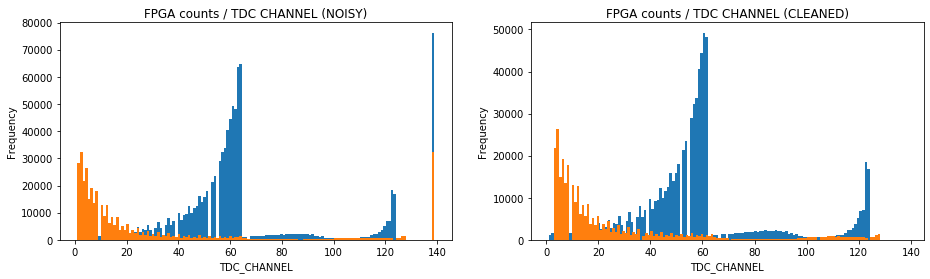

In [55]:
first_FPGA_cleaned = first_FPGA[(first_FPGA["TDC_CHANNEL"] != 139) & (first_FPGA["TDC_CHANNEL"] != 64) & (first_FPGA["TDC_CHANNEL"] != 63)]
second_FPGA_cleaned = second_FPGA[(second_FPGA["TDC_CHANNEL"] != 139) & (second_FPGA["TDC_CHANNEL"] != 2) & (second_FPGA["TDC_CHANNEL"] != 1)]

plt.subplot(1, 2, 1)
first_FPGA['TDC_CHANNEL'].plot.hist(bins = 139)
second_FPGA['TDC_CHANNEL'].plot.hist(bins = 139, title = "FPGA counts / TDC CHANNEL (NOISY)")
plt.xlabel('TDC_CHANNEL')


plt.subplot(1, 2, 2)
first_FPGA_cleaned['TDC_CHANNEL'].plot.hist(bins = 139)
second_FPGA_cleaned['TDC_CHANNEL'].plot.hist(bins = 139, title = "FPGA counts / TDC CHANNEL (CLEANED)")
plt.xlabel('TDC_CHANNEL')
plt.subplots_adjust(left = 2, right = 4)
plt.show()

9\. Count the number of unique orbits. 


In [56]:
data_temp = data[["ORBIT_CNT", "TDC_CHANNEL"]]

num_orb = data_temp.groupby('ORBIT_CNT')
                                                         
print("Number of unique orbits is:", len(num_orb))

Number of unique orbits is: 13044


Count the number of distinct orbits with at least one measurement from TDC_CHANNEL=139

In [57]:
num_orb_139 = data_temp[data_temp["TDC_CHANNEL"] == 139].groupby('ORBIT_CNT')
    
print("Number of distinct orbits measured by channel 139:", len(num_orb_139))

index = 0

for name,group in num_orb_139:
    print(name)
    print(group, "\n")
    index += 1
    if index == 3: break

Number of distinct orbits measured by channel 139: 13019
3869187117
      ORBIT_CNT  TDC_CHANNEL
7    3869187117          139
18   3869187117          139
27   3869187117          139
37   3869187117          139
39   3869187117          139
68   3869187117          139
74   3869187117          139
76   3869187117          139
80   3869187117          139
90   3869187117          139
100  3869187117          139
102  3869187117          139
121  3869187117          139 

3869187118
      ORBIT_CNT  TDC_CHANNEL
135  3869187118          139
145  3869187118          139
154  3869187118          139
160  3869187118          139
166  3869187118          139
174  3869187118          139
185  3869187118          139 

3869187119
      ORBIT_CNT  TDC_CHANNEL
202  3869187119          139
213  3869187119          139
239  3869187119          139
242  3869187119          139
245  3869187119          139
260  3869187119          139
266  3869187119          139
273  3869187119          139 

